In [98]:
import glob
fs=glob.glob('../bZoneProfs/profs2018*nc')
print(fs)

['../bZoneProfs/profs20181018.nc', '../bZoneProfs/profs20181109.nc', '../bZoneProfs/profs20180325.nc', '../bZoneProfs/profs20180107.nc', '../bZoneProfs/profs20180311.nc', '../bZoneProfs/profs20180618.nc', '../bZoneProfs/profs20180709.nc', '../bZoneProfs/profs20180719.nc', '../bZoneProfs/profs20180608.nc', '../bZoneProfs/profs20180123.nc', '../bZoneProfs/profs20180210.nc', '../bZoneProfs/profs20180301.nc', '../bZoneProfs/profs20180117.nc', '../bZoneProfs/profs20181119.nc', '../bZoneProfs/profs20181008.nc', '../bZoneProfs/profs20180224.nc', '../bZoneProfs/profs20181028.nc', '../bZoneProfs/profs20180204.nc', '../bZoneProfs/profs20180315.nc', '../bZoneProfs/profs20180321.nc', '../bZoneProfs/profs20180103.nc', '../bZoneProfs/profs20180628.nc', '../bZoneProfs/profs20180729.nc', '../bZoneProfs/profs20180113.nc', '../bZoneProfs/profs20180220.nc', '../bZoneProfs/profs20180331.nc', '../bZoneProfs/profs20180127.nc', '../bZoneProfs/profs20181129.nc', '../bZoneProfs/profs20180305.nc', '../bZoneProf

In [99]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
zmL=[[]for k in range(13)]
zmKaL=[[]for k in range(13)]
pRateL=[[]for k in range(13)]
pRateCMBL=[[]for k in range(13)]
#pRateCFAD=np.zeros((13,))
bcfL=[[]for k in range(13)]
lonlatL=[[]for k in range(13)]
ic=0
for f in sorted(fs)[:]:
    fh=nc.Dataset(f)
    pType=fh['pType'][:]
    zm=fh['zm'][:]
    pRate=fh['pRate'][:]
    pRateCMB=fh['pRateCMB'][:]
    bzd=fh['bzd'][:]
    bsfc=fh['bsfc'][:]
    bcFree=fh['bcFree'][:].data.astype(int)
    lonlat=fh['lon_lat'][:]
    a=np.nonzero(bcFree>=168)
    ic+=len(a[0])
    #continue
    for i,zkum in enumerate(zm[:,:,0]):
        if bcFree[i]<168:
            continue
        ic+=1
        for k in range(13):
            if (pType[i,0]==1) and abs(bzd[i]-160+2*k)<2:
                zkum[bcFree[i]-90:]=0
                zkam=zm[i,:,1]
                zkam[bcFree[i]-90:]=0
                pRate1=pRate[i,:]
                pRate1[bcFree[i]-90:]=0       
            #print(bzd[i],zkum[150-90:150-90+5])
                if bcFree[i]>=168:
                    zmL[k].append(zkum)
                    zmKaL[k].append(zkam)
                    pRateL[k].append(pRate1)
                    pRateCMBL[k].append(pRateCMB[i,:])
                    bcfL[k].append(bcFree[i])
                    lonlatL[k].append(lonlat[i,:])
        #print(ic)
    #print(fh)
    #break


/var/folders/x_/d2_jzyq50052xh1_tk02bnmc0000gq/T/ipykernel_211/1652074111.py:20: RuntimeWarning: invalid value encountered in cast
  bcFree=fh['bcFree'][:].data.astype(int)


365
4241274
[167 147 165 ... 163 161 163]
1271


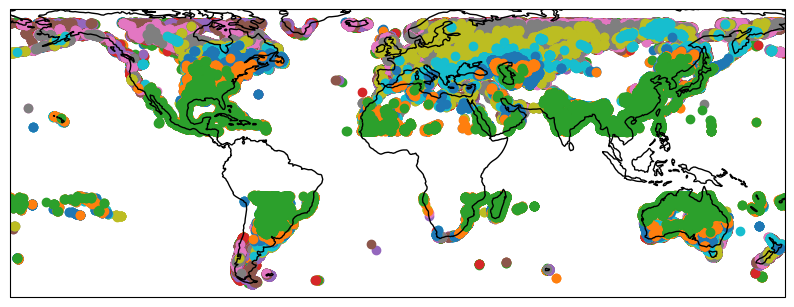

In [100]:
#print(fh['pRateCMB'].shape)
print(len(fs))
#print(zm.shape)
#print(bcFree[i]-90)
print(ic)
#fh['bcFree'][:].data.astype(int)
print(bcFree)
a=np.nonzero(bcFree>168)
print(len(a[0]))
import cartopy.crs as ccrs
import cartopy.feature as cfeature
plt.figure(figsize=(10,10))
ax=plt.axes(projection=ccrs.PlateCarree())
for k in range(13):
    plt.scatter(np.array(lonlatL[k])[:,0],np.array(lonlatL[k])[:,1])
ax.coastlines()

135437 0
136518 1
129647 2
121933 3
126636 4
120020 5
114036 6
82778 7
65582 8
66131 9
72839 10
75237 11
60423 12


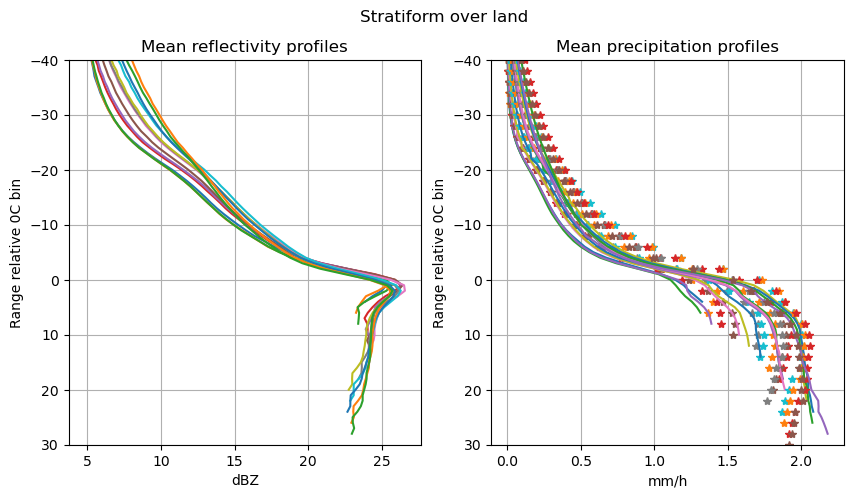

In [101]:
plt.figure(figsize=(10,5))
plt.subplot(121)
for k in range(13):
    if len(zmL[k])<100:
        continue
    zmLk=np.array(zmL[k])
    zmLk[zmLk<0]=0
    plt.plot(zmLk.mean(axis=0)[:75],np.arange(75)+2*k-70)
    #plt.plot(zmLk.mean(axis=0)[(160-2*k-90):(160-2*k-90)+1],np.arange(70-2*k,70-2*k+1)+2*k-70,'*')
    print(len(zmLk),k)
    plt.xlabel('dBZ')
    plt.ylabel('Range relative 0C bin')
plt.ylim(30,-40)
#plt.figure()
plt.grid()
plt.title('Mean reflectivity profiles')
plt.subplot(122)
for k in range(13):
    if len(pRateL[k])<100:
        continue
    pRateLk=np.array(pRateL[k])
    pRateCMBLk=np.array(pRateCMBL[k])
    pRateLk[pRateLk<0]=0
    for i in range(pRateLk.shape[0]):
        if pRateLk[i,38]==0 and pRateLk[i,37]>0:
            pRateLk[i,38]=pRateLk[i,37]
        else:
            if pRateLk[i,36]==0:
                pRateLk[i,38]=pRateLk[i,36]
    pRateCMBLk[pRateCMBLk<0]=0

    plt.plot(pRateLk.mean(axis=0)[:75],np.arange(75)+2*k-70)
    plt.plot(pRateCMBLk.mean(axis=0)[:39],np.arange(39)*2+2*k-70,'*')
    #plt.plot(zmLk.mean(axis=0)[(160-2*k-90):(160-2*k-90)+1],np.arange(70-2*k,70-2*k+1)+2*k-70,'*')
    plt.xlabel('mm/h')
    plt.ylabel('Range relative 0C bin')
plt.ylim(30,-40)
plt.title('Mean precipitation profiles')
plt.grid()
plt.suptitle('Stratiform over land')
plt.savefig('reflectivityProfiles2.png',dpi=300)


In [91]:
print(pRateCMBL[0][0])
print(pRateL[0][0][::2])
print(pRateL[0][0].shape)
print(pRateCMBL[0][0].shape)

[ 0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  0.0000000e+00  0.0000000e+00  0.0000000e+00  0.0000000e+00
  2.2331396e-01  2.3766792e-01  5.0756109e-01  6.5422302e-01
  7.9559088e-01  9.8419333e-01  1.3625849e+00  3.0500460e+00
  3.1160083e+00  2.2452860e+00  2.1297266e+00 -9.9999004e+03
 -9.9999004e+03 -9.9999004e+03 -9.9999004e+03]
[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.24 0.3  0.58 0.67 1.03 2.53 2.55 3.22 3.81 0.   0.   0.
 0.  ]
(86,)
(43,)


In [102]:

import xarray as xr
zkumx=[]
zkamx=[]
pRatex=[]
pRateCMBx=[]
bcfx=[]
bzdx=xr.DataArray(160-np.arange(13)*2,dims=['nbins'])
d={}
for k in range(13):
    zkumx.append(xr.DataArray(np.array(zmL[k]),dims=['time%2.2i'%k,'range']))
    zkamx.append(xr.DataArray(np.array(zmKaL[k]),dims=['time%2.2i'%k,'range']))
    pRatex.append(xr.DataArray(np.array(pRateL[k]),dims=['time%2.2i'%k,'range']))
    pRateCMBx.append(xr.DataArray(np.array(pRateCMBL[k]),dims=['time%2.2i'%k,'range2']))
    bcfx.append(xr.DataArray(np.array(bcfL[k]),dims=['time%2.2i'%k]))
    d["zkum%2.2i"%k]=zkumx[k]
    d["zkam%2.2i"%k]=zkamx[k]
    d["pRate%2.2i"%k]=pRatex[k]
    d["pRateCMB%2.2i"%k]=pRateCMBx[k]
    d["bcf%2.2i"%k]=bcfx[k]
d["bzd"]=bzdx
ds=xr.Dataset(d)

#a=np.nonzero(pType[:,0]==1)
#b=np.nonzero(abs(bzd[a]-160)<3)
#print(len(b[0]))
#print(zm.shape)

In [103]:
comp = dict(zlib=True, complevel=5)
encoding = {var: comp for var in ds.data_vars}
ds.to_netcdf('stratiformProfiles_2.nc',encoding=encoding)

269455


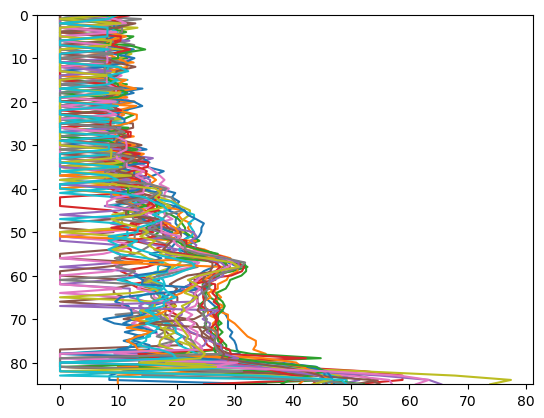

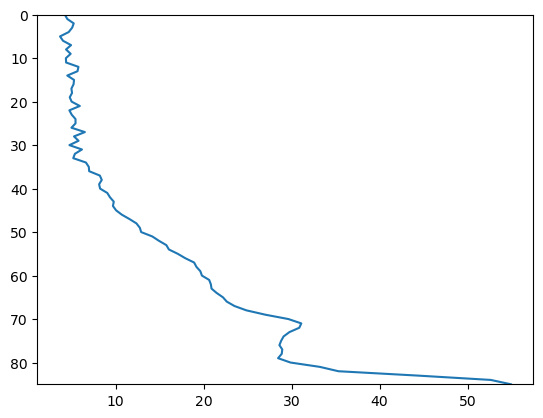

In [36]:
for i in range(100,130):
    plt.plot(zmL[i],np.arange(86))

plt.ylim(85,0)
plt.figure()
plt.plot(zmL[130:230,:].mean(axis=0),np.arange(86))
plt.ylim(85,0)
print(len(zmL))

In [21]:
print(bzd)

[137 173 174 ... 174 175 174]
